# API Installation

In [118]:
pip install wikipedia-api


In [ ]:
pip install -U beautifulsoup4

In [99]:
import wikipediaapi
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

#These import requests allow for data visualization

# Web Scrapping using API

In [100]:
wikiurl="https://en.wikipedia.org/wiki/Metropolitan_statistical_area"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)

print(response.status_code)

#This checks whether the user is allowed to scrape a provided website
#A print return of 200 indicates that it is allowed

200


In [101]:
soup = BeautifulSoup(response.text,'html.parser')
citytable = soup.find('table',{'class':"wikitable"})
print(citytable)

<table class="wikitable sortable">
<caption>The 387 metropolitan statistical areas of the United States<sup class="reference" id="cite_ref-PopEstCBSA_12-4"><a href="#cite_note-PopEstCBSA-12">[12]</a></sup><br/><br/>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Metropolitan statistical area
</th>
<th>2022 estimate
</th>
<th>2020 census
</th>
<th>% change
</th>
<th>Encompassing combined statistical area
</th></tr>
<tr>
<td align="center"><span data-sort-value="7000100000000000000♠">1</span>
</td>
<td><a href="/wiki/New_York_metropolitan_area" title="New York metropolitan area">New York–Newark–Jersey City, NY-NJ MSA</a>
</td>
<td style="text-align:right;">19,557,311
</td>
<td style="text-align:right;">20,081,935
</td>
<td style="text-align:right;"><span data-sort-value="2999739000000000000♠" style="display:none"></span><span style="color:red">−2.61%</span>
</td>
<td><a href="/wiki/New_York_metropolitan_area#Combined_Statistical_Area" title="New York metropolitan area">New York–Newark, NY-NJ-

### Dataset Description

I extracted the data from https://en.wikipedia.org/wiki/Metropolitan_statistical_area using the Wikipedia API. There are more than 300 unique data points but I have caped the table to only contain the first 100 since I downloaded the dataset file from the site. There are 6 different Columns for each data points.**bold text**

In [107]:
dataread = pd.read_html(str(citytable))
dataread = pd.DataFrame(dataread[0])
dataread[0:101]

#The is a dataframe that is created which contains the information from the website
#The is a dataframe that is created which contains the information from the website

,Rank,Metropolitan statistical area,2022 estimate,2020 census,% change,Encompassing combined statistical area
0,1,"New York–Newark–Jersey City, NY-NJ MSA",19557311,20081935,−2.61%,"New York–Newark, NY-NJ-CT-PA CSA"
1,2,"Los Angeles–Long Beach–Anaheim, CA MSA",12872322,13200998,−2.49%,"Los Angeles–Long Beach, CA CSA"
2,3,"Chicago–Naperville–Elgin, IL-IN MSA",9274140,9449351,−1.85%,"Chicago–Naperville, IL-IN-WI CSA"
3,4,"Dallas–Fort Worth–Arlington, TX MSA",7943685,7637387,+4.01%,"Dallas–Fort Worth, TX-OK CSA"
4,5,"Houston–Pasadena–The Woodlands, TX MSA",7368466,7149642,+3.06%,"Houston–Pasadena, TX CSA"
...,...,...,...,...,...,...
96,97,"Spokane–Spokane Valley, WA MSA",597919,585784,+2.07%,"Spokane–Spokane Valley–Coeur d'Alene, WA-ID CSA"
97,98,"Fayetteville–Springdale–Rogers, AR MSA",576403,546725,+5.43%,NaN
98,99,"Chattanooga, TN-GA MSA",574507,562647,+2.11%,"Chattanooga–Cleveland–Dalton, TN-GA-AL CSA"
99,100,"New Haven, CT MSA",573244,570487,+0.48%,"New Haven–Hartford–Waterbury, CT CSA"


In [103]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

us_cities_table_df = dataread

us_cities_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Rank                                    387 non-null    int64 
 1   Metropolitan statistical area           387 non-null    object
 2   2022 estimate                           387 non-null    int64 
 3   2020 census                             387 non-null    int64 
 4   % change                                387 non-null    object
 5   Encompassing combined statistical area  275 non-null    object
dtypes: int64(3), object(3)
memory usage: 18.3+ KB


# Visulization

With this visualization, I put 10 cities from the top 100 most populated cities on a graph measuring their growth rate according to their population. From the graph, we can see that the large city with the highest growth rate were the ones ranked 9, 41,69,16, and 66  These cities are experiencing significant population growth and we can look at more indepth characteristcs of what makes these places an attractive place to move to.

<Axes: xlabel='Rank'>

Text(0.5, 1.0, 'Fastest growing U.S Cities by their Population rankings')

Text(0.5, 0, 'Rank')

Text(0, 0.5, '2022 Estimate')

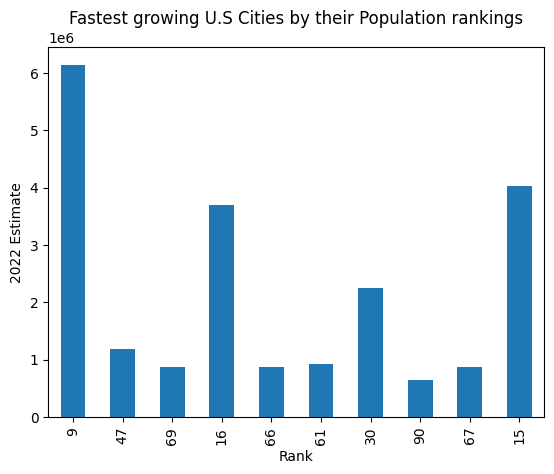

In [117]:
# Sort the DataFrame by % change in  order

Hundred_cities = us_cities_table_df[us_cities_table_df['Rank'] <= 100]

sorted_df = Hundred_cities.sort_values(by='% change', ascending=True)

# Select the top 10 fastest-growing
top_10_fastest_growing = sorted_df.head(10)

# plot
top_10_fastest_growing.plot(kind='bar', x='Rank', y='2022 estimate', legend=False)
plt.title('Fastest growing U.S Cities by their Population rankings')
plt.xlabel('Rank')
plt.ylabel('2022 Estimate')
plt.show()


### Limitations

For my code the column of the metro regions didn't convert into a datatype that I could use, so I used the ranking variable instead since they coorelate but that means I need to manually check the rank to its names.